# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Agistia Ronna Aniqa
- **Email:** agistiaronnaa@gmail.com
- **ID Dicoding:** MC299D5X1601

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan layanan Bike Sharing berdasarkan waktu selama musim panas?
- Bagaimana perbandingan jumlah penggunaan layanan Bike Sharing antara pengguna kasual dan terdaftar di setiap musim?
- Bagaimana dampak kondisi cuaca terhadap frekuensi penggunaan layanan Bike Sharing?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## Data Wrangling

### Gathering Data

Pada proses pengumpulan data, kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab pertanyaan atau masalah bisnis yang ingin kita hadapi.

Mengimpor dataset "day.csv" yang berisi informasi mengenai penggunaan layanan Bike Sharing. Data ini diambil dari repository GitHub.

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/agstronna/Analisis-Data_BikeSharing/refs/heads/main/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengimpor dataset "hour.csv" yang berisi informasi mengenai penggunaan layanan Bike Sharing per jam. Data ini diambil dari repository GitHub.

In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/agstronna/Analisis-Data_BikeSharing/refs/heads/main/Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- Struktur Dataset: Dataset mencatat penyewaan sepeda berdasarkan tanggal, waktu, musim, status hari libur dan kerja, kondisi cuaca, serta tipe pengguna.  
- Pola Waktu: Penggunaan dapat dianalisis per hari dan jam, dengan kemungkinan lonjakan saat jam tertentu.  
- Jenis Pengguna: Terdapat dua tipe pengguna, yaitu kasual dan terdaftar.  
- Pengaruh Cuaca: Faktor cuaca (suhu, kelembapan, kecepatan angin) yang telah dinormalisasi berpotensi memengaruhi jumlah peminjaman.  
- Musim & Tren: Penggunaan cenderung bervariasi berdasarkan musim, dengan potensi peningkatan di musim tertentu.  
- Hari Kerja & Libur: Pola peminjaman dapat berbeda antara hari kerja dan akhir pekan/libur.

### Assessing Data

Proses penilaian data dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti nilai yang hilang (missing value), nilai yang tidak standar (unstandard value), dan lain-lain.

#### Menilai tabel `day_df`

Menampilkan informasi mengenai dataset "day.csv" untuk mendapatkan gambaran umum tentang struktur data, termasuk jumlah baris, tipe data, dan apakah terdapat nilai-nilai yang hilang.

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengidentifikasi jumlah nilai yang hilang (missing values) dalam dataset "day.csv".

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mengidentifikasi jumlah duplikasi dalam dataset "day.csv".

In [7]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Menghitung statistik deskriptif untuk dataset "day.csv". Statistik deskriptif memberikan gambaran umum tentang distribusi data, termasuk nilai rata-rata, standar deviasi, minimum, maksimum, dan kuartil.

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

- Dataset ini berisi 731 baris dan 16 kolom, mencakup informasi penyewaan sepeda selama dua tahun.
- Kolom `dteday` memiliki tipe data objek yang perlu dikoreksi ke tipe data tanggal.
- Tidak terdapat nilai yang hilang dalam dataset ini, sehingga tidak memerlukan penanganan missing values.
- Tidak terdapat data duplikat yang harus dihapus.
- Tidak terdapat nilai yang tidak akurat dalam data ini, sehingga kualitas datanya dapat dianggap baik.

#### Menilai tabel `hour_df`

Menampilkan informasi mengenai dataset "hour.csv" untuk mendapatkan gambaran umum tentang struktur data, termasuk jumlah baris, tipe data, dan apakah terdapat nilai-nilai yang hilang.

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengidentifikasi jumlah nilai yang hilang (missing values) dalam dataset "hour.csv".

In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Mengidentifikasi jumlah duplikasi dalam dataset "hour.csv".

In [11]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


Menghitung statistik deskriptif untuk dataset "hour.csv". Statistik deskriptif memberikan gambaran umum tentang distribusi data, termasuk nilai rata-rata, standar deviasi, minimum, maksimum, dan kuartil.

In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

- Dataset ini terdiri dari 17.379 baris dan 17 kolom, mencakup berbagai informasi penyewaan sepeda.
- Kolom `dteday` memiliki tipe data objek yang perlu dikoreksi ke tipe data tanggal untuk analisis yang lebih akurat.
- Tidak ada nilai yang hilang dalam dataset ini, sehingga tidak memerlukan penanganan missing values.
- Dataset ini tidak mengandung data duplikat, sehingga tidak perlu dilakukan penghapusan duplikasi.
- Tidak ditemukan nilai yang tidak akurat dalam data ini, menunjukkan bahwa kualitas data cukup baik.

### Cleaning Data

Membuat rancangan tahapan dan metode pembersihan data berdasarkan masalah yang ditemukan dalam proses assessing data.

Mengonversi kolom `dteday` pada dataset `day_df` dan `hour_df` menjadi tipe data datetime.

In [13]:
dataframe = [day_df, hour_df]

for df in dataframe:
  df['dteday'] = pd.to_datetime(df['dteday'])

Mengonversi nilai dalam kolom `yr` pada dataset `day_df` dan `hour_df` dari integer ke string yang merepresentasikan tahun.

In [14]:
yr_str = {
    0: '2011',
    1: '2012'
}

day_df['yr'] = day_df['yr'].map(yr_str)
hour_df['yr'] = hour_df['yr'].map(yr_str)

Mengonversi nilai dalam kolom `mnth` pada dataset `day_df` dan `hour_df` dari integer ke string yang merepresentasikan bulan.

1: “January”<br>
2: “February”<br>
3: “March”<br>
4: “April”<br>
5: “May”<br>
6: “June”<br>
7: “July”<br>
8: “August”<br>
9: “September”<br>
10: “October”<br>
11: “November”<br>
12: “December”

In [15]:
mnth_str = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

day_df['mnth'] = day_df['mnth'].map(mnth_str)
hour_df['mnth'] = hour_df['mnth'].map(mnth_str)

Menampilkan semua nilai unik dalam kolom `mnth` pada dataset `day_df`.

In [16]:
day_df['mnth'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

Mengubah nilai dalam kolom `weekday` pada dataset `day_df` dan `hour_df` dari integer ke string yang merepresentasikan hari dalam seminggu.

0: “Sunday”<br>
1: “Monday”<br>
2: “Tuesday”<br>
3: “Wednesday”<br>
4: “Thursday”<br>
5: “Friday”<br>
6: “Saturday”

In [17]:
weekday_str = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}

day_df['weekday'] = day_df['weekday'].map(weekday_str)
hour_df['weekday'] = hour_df['weekday'].map(weekday_str)

Menampilkan semua nilai unik dalam kolom `weekday` pada dataset `day_df`.

In [18]:
day_df['weekday'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

Mengubah nilai dalam kolom `season` pada dataset `day_df` dan `hour_df` dari integer ke string yang merepresentasikan musim.

1: Spring<br>
2: Summer<br>
3: Fall<br>
4: Winter

In [19]:
season_str = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

day_df['season'] = day_df['season'].map(season_str)
hour_df['season'] = hour_df['season'].map(season_str)

Menampilkan semua nilai unik dalam kolom `season` pada dataset `day_df`.

In [20]:
day_df['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

Mengubah nilai dalam kolom `weathersit` pada dataset `day_df` dan `hour_df` dari integer ke string yang merepresentasikan kondisi cuaca.

1: "clear"  
2: "mist"  
3: "light snow"  
4: "heavy rain"

In [21]:
weathersit_str = {
    1: "clear",
    2: "mist",
    3: "light snow",
    4: "heavy rain"
}

day_df['weathersit'] = day_df['weathersit'].map(weathersit_str)
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_str)

Menampilkan semua nilai unik dalam kolom `weathersit` pada dataset `hour_df`.

In [22]:
hour_df['weathersit'].unique()

array(['clear', 'mist', 'light snow', 'heavy rain'], dtype=object)

Dalam dataset ini, terdapat ketergantungan antara kolom Workingday dan Holiday, karena keduanya memiliki makna serupa. Kolom Holiday menunjukkan nilai 0 untuk Tidak Libur dan nilai 1 untuk Libur, sedangkan kolom Workingday menunjukkan nilai 0 untuk Tidak Masuk Kerja dan nilai 1 untuk Masuk Kerja. Karena kedua kolom ini menggambarkan konsep yang sama, salah satu kolom dapat dihapus untuk menghindari redundansi. Kolom Workingday lebih relevan untuk analisis terkait aktivitas kerja, sehingga kolom Holiday dapat dihapus.


Menghapus kolom `holiday` dari dataset `hour_df` dan `day_df`.

In [23]:
# Menghapus kolom holiday
hour_df.drop('holiday', axis=1, inplace=True)
day_df.drop('holiday', axis=1, inplace=True)

Mengganti nama kolom `workingday` menjadi `daystatus` pada dataset `day_df` dan `hour_df`.

In [24]:
day_df.rename(columns={'workingday': 'daystatus'}, inplace=True)
hour_df.rename(columns={'workingday': 'daystatus'}, inplace=True)

Mengubah nilai dalam kolom `daystatus` pada dataset `day_df` dan `hour_df` dari integer ke string yang merepresentasikan status hari kerja atau hari libur.

In [25]:
workingday_str = {
    0: "Holiday",
    1: "Workingday"
}

day_df['daystatus'] = day_df['daystatus'].map(workingday_str)
hour_df['daystatus'] = hour_df['daystatus'].map(workingday_str)

Menampilkan semua nilai unik dalam kolom `daystatus` pada dataset `day_df`.

In [26]:
day_df['daystatus'].unique()

array(['Holiday', 'Workingday'], dtype=object)

**Insight:**

- Menghapus kolom holiday yang tidak diperlukan, karena informasinya sudah diwakili oleh kolom workingday.
- Mengubah tipe data kolom `dteday` dari object menjadi datetime.
- Mengonversi nilai dari integer/numerik ke string sesuai kebutuhan analisis.

## Exploratory Data Analysis (EDA)

Tahap eksplorasi data yang telah dibersihkan bertujuan untuk memperoleh insight dan menjawab pertanyaan analisis.

### Explore ...

Menghitung statistik deskriptif untuk dataset "day.csv" dengan menyertakan semua kolom, baik numerik maupun kategorikal. Hal ini memberikan gambaran umum yang lebih lengkap tentang distribusi data.

In [27]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,weekday,daystatus,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,January,Saturday,Workingday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menghitung statistik deskriptif untuk dataset "hour.csv" dengan menyertakan semua kolom, baik numerik maupun kategorikal. Hal ini memberikan gambaran umum yang lebih lengkap tentang distribusi data.

In [28]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,weekday,daystatus,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,Saturday,Workingday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Melakukan agregasi data pada dataset `day_df` berdasarkan kolom `weekday`.

In [29]:
# Jumlah pengguna per hari.
day_df.groupby(by="weekday").agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday  casual registered   cnt                           
          nunique     sum        sum   min   max         mean     sum
weekday                                                              
Friday        104   78238     409552  1167  8362  4690.288462  487790
Monday        105   70784     384719    22  7525  4338.123810  455503
Saturday      105  153852     323955   627  8714  4550.542857  477807
Sunday        105  140521     303506   605  8227  4228.828571  444027
Thursday      104   61460     423935   431  7804  4667.259615  485395
Tuesday       104   57843     411266   683  7767  4510.663462  469109
Wednesday     104   57319     415729   441  8173  4548.538462  473048

**Insight:**

- Jumlah pengguna casual dan registered menunjukkan variasi setiap harinya.
 - Pengguna casual terbanyak tercatat pada hari Sabtu dengan total 153.852.
 - Pengguna casual paling sedikit tercatat pada hari Rabu dengan total 57.319.
 - Pengguna registered tertinggi tercatat pada hari Kamis dengan total 423.935.
 - Pengguna registered terendah tercatat pada hari Minggu dengan total 303.506.

- Total cnt juga bervariasi antar hari.
 - Jumlah tertinggi pada hari Jumat mencapai 487.790.
 - Jumlah terendah pada hari Minggu sebesar 444.027.

Melakukan agregasi data pada dataset `day_df` berdasarkan kolom `yr` dan `mnth`.

In [30]:
# Jumlah pengguna per bulan selama rentang waktu 2 tahun.
day_df.groupby(by=["yr","mnth"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday casual registered   cnt                           
               nunique    sum        sum   min   max         mean     sum
yr   mnth                                                                
2011 April          30  22346      72524   795  5312  3162.333333   94870
     August         31  28842     107849  1115  5895  4409.387097  136691
     December       31   8448      78875   705  3940  2816.870968   87323
     February       28   6242      41973  1005  2927  1721.964286   48215
     January        31   3073      35116   431  1985  1231.903226   38189
     July           31  36452     104889  3285  6043  4559.387097  141341
     June           30  30612     112900  3767  5515  4783.733333  143512
     March          31  12826      51219   605  3239  2065.967742   64045
     May            31  31050     104771  2633  5805  4381.322581  135821
     November       30  15594      86573  1495  4486  3405.566667  102167
     October        31  25222      98289   627  5511  3984.225806  123511
     September      30  26545     100873  1842  5423  4247.266667  127418
2012 April          30  38456     135768  1027  7460  5807.466667  174224
     August         31  43197     171306  4549  7865  6919.451613  214503
     December       31  13245     110468   441  6606  3990.741935  123713
     February       29   8721      94416  1529  5062  3556.448276  103137
     January        31   8969      87775  1301  4521  3120.774194   96744
     July           31  41705     161902  4459  8173  6567.967742  203607
     June           30  43294     159536  4127  8120  6761.000000  202830
     March          31  31618     133257  3194  8362  5318.548387  164875
     May            31  44235     151630  2843  8294  6318.225806  195865
     November       30  21009     131655  2277  6852  5088.800000  152664
     October        31  34538     164303    22  8156  6414.225806  198841
     September      30  43778     174795  4073  8714  7285.766667  218573

**Insight:**

- Pada tahun 2011:
  - Pengguna Bike Sharing terbanyak tercatat pada bulan Juni dengan total 143.512 pengguna.
  - Pengguna Bike Sharing paling sedikit tercatat pada bulan Januari dengan total 38.189 pengguna.

- Pada tahun 2012:
  - Pengguna Bike Sharing terbanyak tercatat pada bulan September dengan total 218.573 pengguna.
  - Pengguna Bike Sharing paling sedikit tercatat pada bulan Januari dengan total 96.744 pengguna.


Melakukan agregasi data pada dataset `hour_df` berdasarkan kolom `season` dan `weathersit`.

In [31]:
# Jumlah pengguna berdasarkan musim dan kondisi cuaca.
hour_df.groupby(by=["season","weathersit"]).agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday  casual registered cnt                         
                  nunique     sum        sum min  max        mean     sum
season weathersit                                                        
Fall   clear          183  174014     627927   1  977  244.494207  801941
       light snow      72    9727      36529   1  891  171.955390   46256
       mist           140   42350     170582   2  868  224.848997  212932
Spring clear          174   44462     280816   1  801  122.055535  325278
       heavy rain       3       8        215  23  164   74.333333     223
       light snow      75    1392      20250   1  520   58.650407   21642
       mist           146   14760     109445   1  712  103.074689  124205
Summer clear          177  151197     513266   1  873  232.410983  664463
       light snow      91    7413      39350   1  782  115.179803   46763
       mist           146   44912     162451   1  957  181.261364  207363
Winter clear          166   93072     453419   1  967  209.463779  546491
       light snow      62    4251      39419   1  856  116.453333   43670
       mist           135   32459     218993   1  905  201.483974  251452

**Insight:**

- Berdasarkan musim dan kondisi cuaca:
  - Pengguna terbanyak tercatat di musim gugur (Fall) saat cuaca cerah (clear) dengan total 801.941 pengguna.
  - Pengguna paling sedikit tercatat di musim semi (Spring) saat cuaca hujan deras (heavy rain) dengan total 223 pengguna.

Melakukan agregasi data pada dataset `day_df` berdasarkan kolom `daystatus`.

In [32]:
day_df.groupby(by="daystatus").agg({
    "dteday": "count",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min","max", "mean", "sum"]
})

dteday  casual registered  cnt                            
            count     sum        sum  min   max         mean      sum
daystatus                                                            
Holiday       231  316732     683537  605  8714  4330.168831  1000269
Workingday    500  303285    1989125   22  8362  4584.820000  2292410

**Insight:**

- Berdasarkan status hari, terdapat perbedaan pola penggunaan antara pengguna Casual dan Registered:
  - Pengguna Casual cenderung lebih banyak pada hari libur (Holiday) dibandingkan dengan hari kerja (Workingday).
  - Pengguna Registered lebih banyak pada hari kerja (Workingday) dibandingkan dengan hari libur (Holiday).
- Akumulasi total pengguna cenderung lebih tinggi pada hari kerja (Workingday).

## Visualization & Explanatory Analysis

Dalam proses explanatory analysis, visualisasi data digunakan sebagai media untuk menyampaikan pesan atau cerita dari sebuah data.

### Pertanyaan 1: Bagaimana pola penggunaan layanan Bike Sharing berdasarkan waktu selama musim panas?

Membuat visualisasi untuk melihat produktivitas layanan Bike Sharing berdasarkan waktu dalam sehari selama musim panas. Visualisasi ini menggunakan data dari dataset `hour_df`.

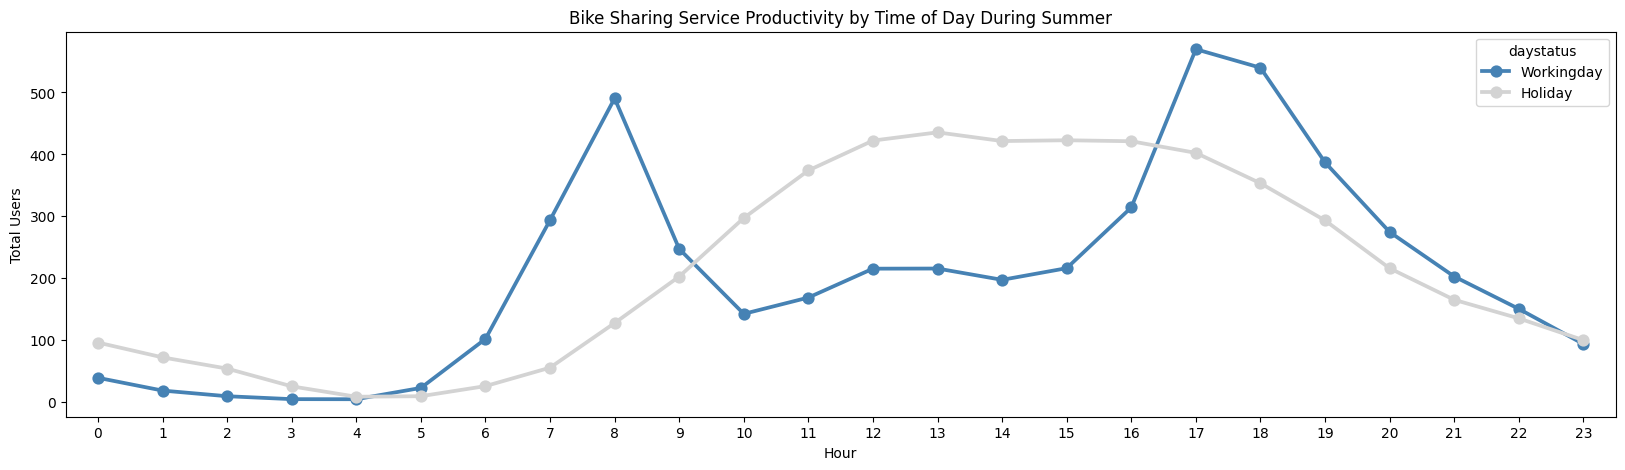

In [33]:
# Memfilter data untuk hanya musim panas

summer_df = hour_df[hour_df['season'] == 'Summer']

custom_color = sns.color_palette(["#4682B4", "#D3D3D3"])

fig, ax = plt.subplots(figsize=(20, 5))

sns.pointplot(data=summer_df, x='hr', y='cnt', hue='daystatus', errorbar=None, ax=ax, palette=custom_color)
ax.set(title='Bike Sharing Service Productivity by Time of Day During Summer')
ax.set_ylabel('Total Users')
ax.set_xlabel('Hour')
plt.show()


**Insight:**

- Produktivitas Bike Sharing berdasarkan jam pada workingday dan holiday selama musim panas menunjukkan pola yang jelas:
  - Pada workingday:
    - Terlihat adanya lonjakan penggunaan di pagi hari, dengan puncak penggunaan pukul 08.00.
    - Setelah itu, terjadi penurunan tajam hingga sekitar pukul 10.00.
    - Penggunaan mulai meningkat lagi dan mencapai puncak kedua pukul 17.00.
  - Pada holiday:
    - Terlihat adanya lonjakan penggunaan di siang hari, dengan puncak penggunaan pukul 13.00.
    - Setelah itu, terjadi penurunan bertahap dari sore hingga malam hari.

### Pertanyaan 2: Bagaimana perbandingan jumlah penggunaan layanan Bike Sharing antara pengguna kasual dan terdaftar di setiap musim?

Menghitung jumlah total pengguna kasual dan terdaftar berdasarkan musim. Setelah itu, kita akan menggabungkan hasil tersebut ke dalam satu dataframe untuk analisis lebih lanjut.

In [34]:
total_casual_users = hour_df.groupby("season").casual.sum().sort_values(ascending=False).reset_index()
total_registered_users = hour_df.groupby("season").registered.sum().sort_values(ascending=False).reset_index()

total_users = pd.merge(
    left=total_casual_users,
    right=total_registered_users,
    how="left",
    left_on="season",
    right_on="season"
)

total_users

,season,casual,registered
0,Fall,226091,835038
1,Summer,203522,715067
2,Winter,129782,711831
3,Spring,60622,410726


Membuat visualisasi untuk membandingkan jumlah pengguna kasual dan terdaftar berdasarkan musim. Visualisasi ini menggunakan data dari dataset `total_users`.

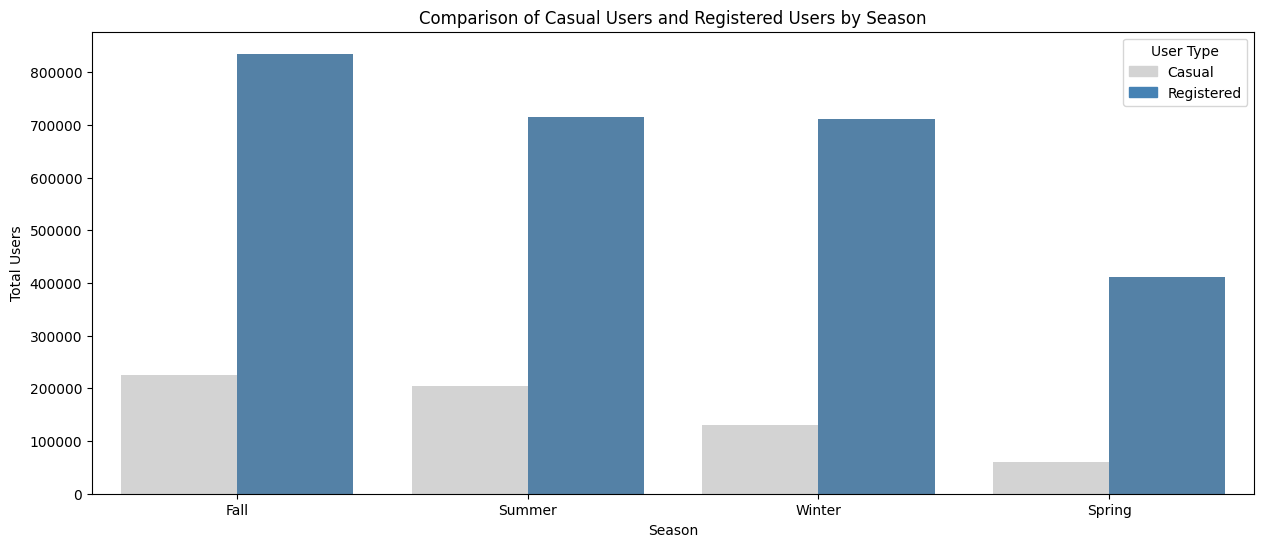

In [35]:
new_palette = ["#D3D3D3", "#4682B4"]

total_users_season = total_users.melt(id_vars='season', var_name='tipePengguna', value_name='jumlahPengguna')

plt.figure(figsize=(15, 6))

sns.barplot(x="season", y="jumlahPengguna", hue="tipePengguna", data=total_users_season, palette=new_palette)
plt.ylabel("Total Users")
plt.xlabel("Season")
plt.title("Comparison of Casual Users and Registered Users by Season")

casual_patch = mpatches.Patch(color=new_palette[0], label='Casual')
registered_patch = mpatches.Patch(color=new_palette[1], label='Registered')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")

plt.show()

Membuat visualisasi untuk melihat jumlah pengguna kasual dan terdaftar berdasarkan musim. Visualisasi ini menggunakan data dari dataset `total_casual_users` dan `total_registered_users`.

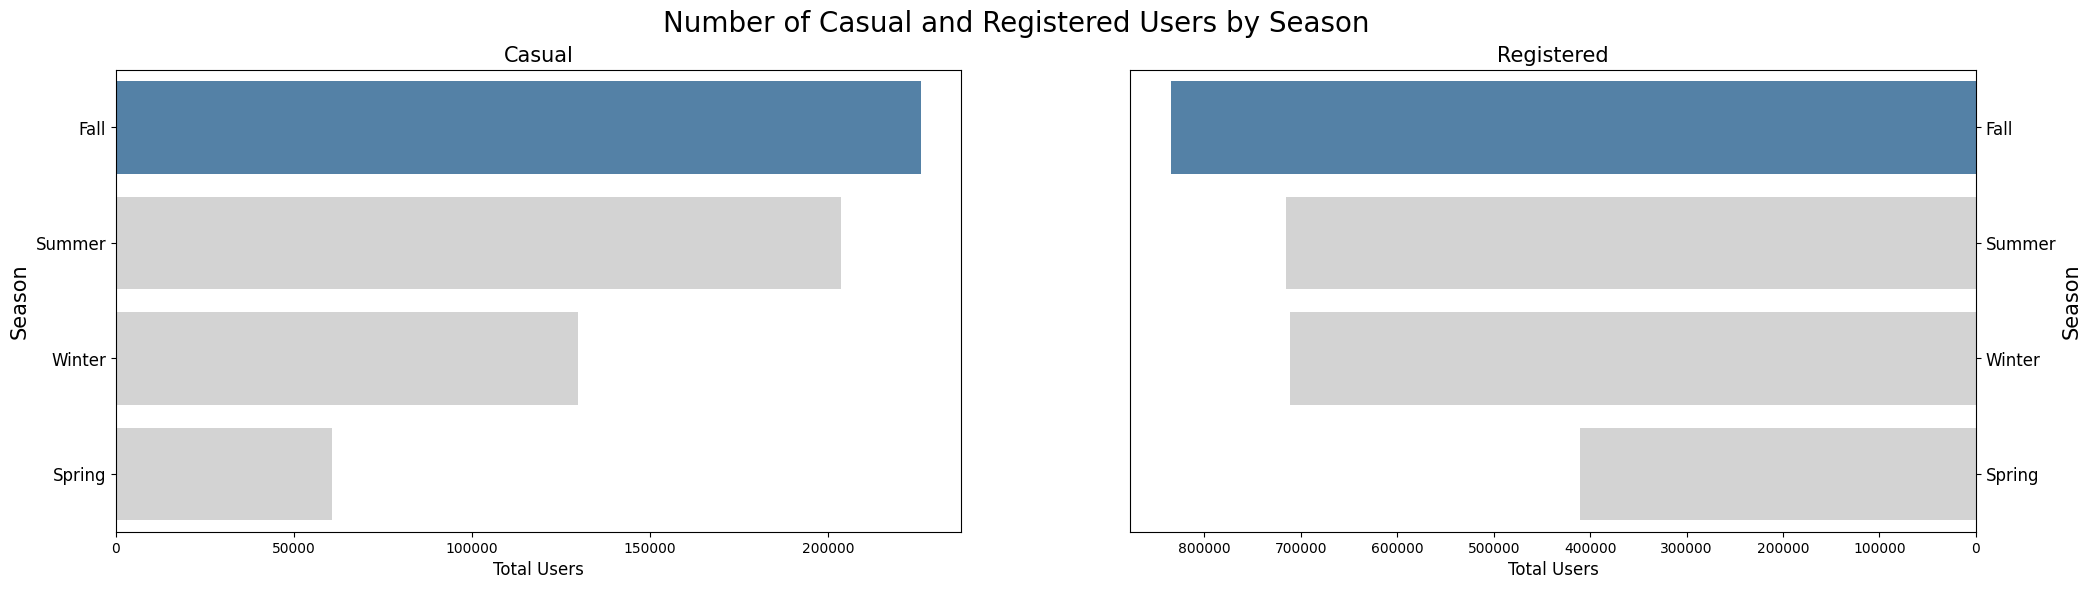

In [36]:
new_palette = ["#4682B4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="casual", y="season", data=total_casual_users, palette=new_palette, hue="season", legend=False, ax=ax[0])
ax[0].set_ylabel("Season", fontsize=15)
ax[0].set_xlabel("Total Users", fontsize=12)
ax[0].set_title("Casual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="registered", y="season", data=total_registered_users, hue="season", legend=False, palette=new_palette, ax=ax[1])
ax[1].set_ylabel("Season", fontsize=15)
ax[1].set_xlabel("Total Users", fontsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual and Registered Users by Season", fontsize=20)
plt.show()

**Insight:**

- Pengguna Registered selalu mendominasi di setiap musim.
  - Jumlah tertinggi pada musim gugur (Fall).
  - Jumlah terendah pada musim semi (Spring).
- Pengguna Casual menunjukkan variasi yang lebih besar.
  - Jumlah tertinggi pada musim gugur (Fall).
  - Jumlah terendah pada musim semi (Spring).
- Musim mempengaruhi preferensi dan jumlah pengguna sepeda berdasarkan tipe pengguna.

### Pertanyaan 3: Bagaimana dampak kondisi cuaca terhadap frekuensi penggunaan layanan Bike Sharing?

Menghitung jumlah total pengguna berdasarkan kondisi cuaca. Agregasi ini mencakup jumlah total pengguna untuk setiap kondisi cuaca yang ada dalam dataset `hour_df`.

In [37]:
total_users_by_weather = hour_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()

membuat visualisasi untuk melihat jumlah total pengguna berdasarkan kondisi cuaca. Visualisasi ini menggunakan data dari dataset `total_users_by_weather`.

<ipython-input-38-35f6a75c07c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="cnt", x="weathersit", data=total_users_by_weather.sort_values(by="cnt", ascending=False), palette=new_palette)


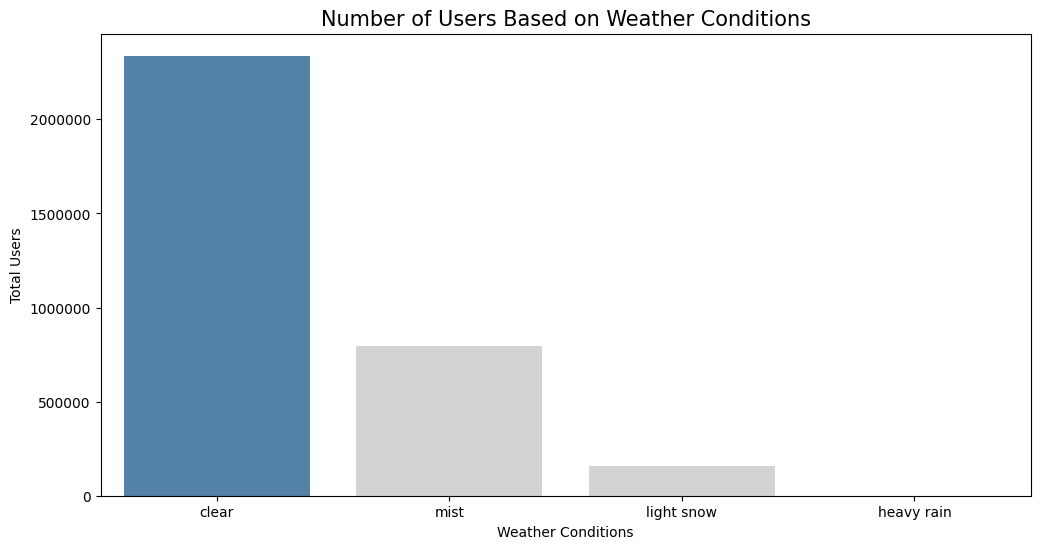

In [38]:
new_color = ["#4682B4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(12, 6))
sns.barplot(y="cnt", x="weathersit", data=total_users_by_weather.sort_values(by="cnt", ascending=False), palette=new_palette)
plt.title("Number of Users Based on Weather Conditions", loc="center", fontsize=15)
plt.ylabel("Total Users")
plt.xlabel("Weather Conditions")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Insight:**

- Jumlah pengguna tertinggi tercatat saat kondisi cuaca cerah (clear).
- Jumlah pengguna terendah terjadi saat cuaca hujan lebat (heavy rain).
- Orang cenderung lebih sering menggunakan layanan sepeda ketika cuaca cerah.
- Orang cenderung enggan menggunakan layanan sepeda saat cuaca hujan lebat.

## Analisis Lanjutan (Opsional)

Untuk menjawab pertanyaan analisis, kita dapat menggunakan teknik analisis lanjutan yang dikenal sebagai RFM analysis.

###RFM Analysis

RFM analysis adalah salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

Melakukan pengelompokan data pada dataset `hour_df` berdasarkan kolom `weekday` untuk menghitung nilai recency, frequency, dan monetary. Nilai ini digunakan untuk analisis RFM yang membantu memahami perilaku pengguna.

In [39]:
rfm_df = hour_df.groupby(by="weekday", as_index=False).agg({
    "dteday": "max",
    "instant": "nunique",
    "cnt": "sum"
})

rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = hour_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,weekday,frequency,monetary,recency
0,Friday,2487,487790,3
1,Monday,2479,455503,0
2,Saturday,2512,477807,2
3,Sunday,2502,444027,1
4,Thursday,2471,485395,4
5,Tuesday,2453,469109,6
6,Wednesday,2475,473048,5


Membuat visualisasi untuk melihat pelanggan terbaik berdasarkan parameter RFM (Recency, Frequency, Monetary) dalam dataset `hour_df`. Visualisasi ini membantu memahami perilaku pengguna berdasarkan hari dalam seminggu.

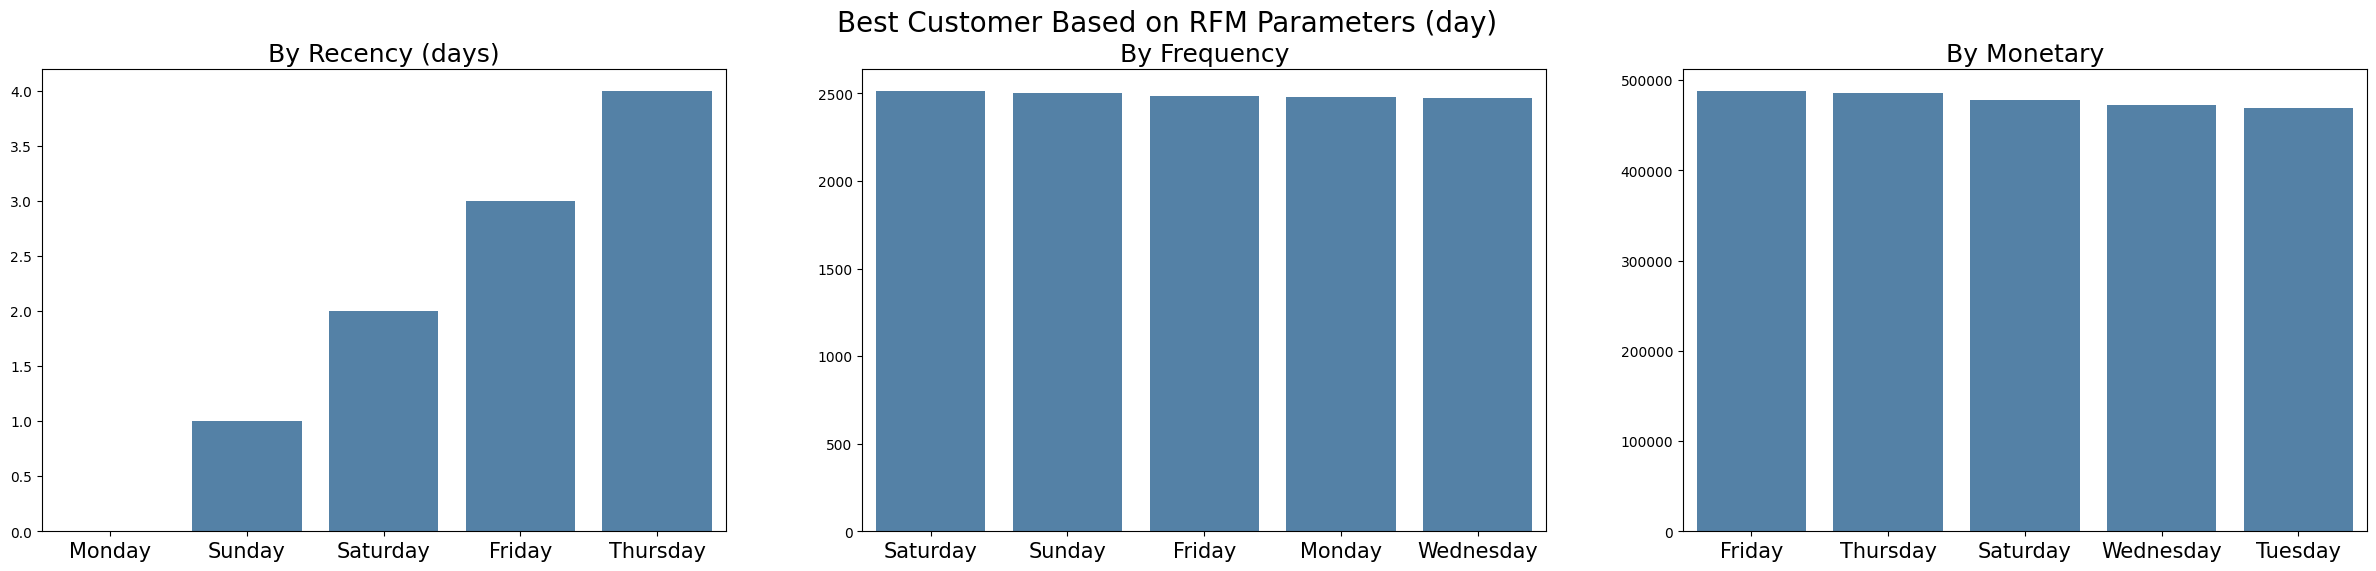

In [40]:
new_color = "#4682B4"

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="weekday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color=new_color, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="weekday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color=new_color, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="weekday", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color=new_color, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)
plt.show()

### Clustering: Mengelompokkan jumlah pelanggan menjadi Low/Middle/High

Menghitung statistik deskriptif untuk kolom `cnt` dalam dataset `hour_df`. Statistik deskriptif ini memberikan gambaran umum mengenai distribusi data dalam kolom tersebut.

In [41]:
hour_df['cnt'].describe()

,cnt
count,17379.000000
mean,189.463088
std,181.387599
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


Melakukan beberapa perhitungan statistik dan mengelompokkan data pengguna ke dalam tiga level (Low, Middle, High) berdasarkan nilai `cnt`.

In [42]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

min_cnt = hour_df['cnt'].min()
max_cnt = hour_df['cnt'].max()

hour_df['level_pengguna'] = pd.cut(hour_df['cnt'],
                                bins=[min_cnt, Q1, Q3, max_cnt],
                                labels=['Low', 'Middle', 'High'],
                                include_lowest=True)

Mengelompokkan data pengguna dalam dataset `hour_df` berdasarkan level pengguna (Low, Middle, High) yang telah ditentukan sebelumnya. Kemudian, kita menampilkan tiga baris pertama dari setiap level.

In [43]:
hour_df.groupby('level_pengguna').head(3)

<ipython-input-43-be5d1376f80c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('level_pengguna').head(3)


,instant,dteday,season,yr,mnth,hr,weekday,daystatus,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,level_pengguna
0,1,2011-01-01,Spring,2011,January,0,Saturday,Holiday,clear,0.24,0.2879,0.81,0.0000,3,13,16,Low
1,2,2011-01-01,Spring,2011,January,1,Saturday,Holiday,clear,0.22,0.2727,0.80,0.0000,8,32,40,Low
2,3,2011-01-01,Spring,2011,January,2,Saturday,Holiday,clear,0.22,0.2727,0.80,0.0000,5,27,32,Low
11,12,2011-01-01,Spring,2011,January,11,Saturday,Holiday,clear,0.36,0.3333,0.81,0.2836,26,30,56,Middle
12,13,2011-01-01,Spring,2011,January,12,Saturday,Holiday,clear,0.42,0.4242,0.77,0.2836,29,55,84,Middle
13,14,2011-01-01,Spring,2011,January,13,Saturday,Holiday,mist,0.46,0.4545,0.72,0.2985,47,47,94,Middle
1070,1071,2011-02-17,Spring,2011,February,8,Thursday,Workingday,clear,0.32,0.3333,0.57,0.0896,18,267,285,High
1103,1104,2011-02-18,Spring,2011,February,17,Friday,Workingday,clear,0.66,0.6212,0.34,0.3582,52,275,327,High
1305,1306,2011-02-27,Spring,2011,February,14,Sunday,Holiday,clear,0.44,0.4394,0.47,0.0896,105,177,282,High


Menghitung jumlah total pengguna berdasarkan level pengguna (Low, Middle, High) dalam dataset `hour_df`.

In [44]:
user_levels_total = hour_df.groupby("level_pengguna")['level_pengguna'].count().sort_values(ascending=False).reset_index(name='count')
user_levels_total

<ipython-input-44-a261781e7533>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_levels_total = hour_df.groupby("level_pengguna")['level_pengguna'].count().sort_values(ascending=False).reset_index(name='count')


,level_pengguna,count
0,Middle,8676
1,Low,4377
2,High,4326


Membuat visualisasi untuk melihat jumlah total pengguna berdasarkan level pengguna (Low, Middle, High).

<ipython-input-45-cab35d8ba9e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='level_pengguna', y='count', data=user_levels_total, palette=colors)


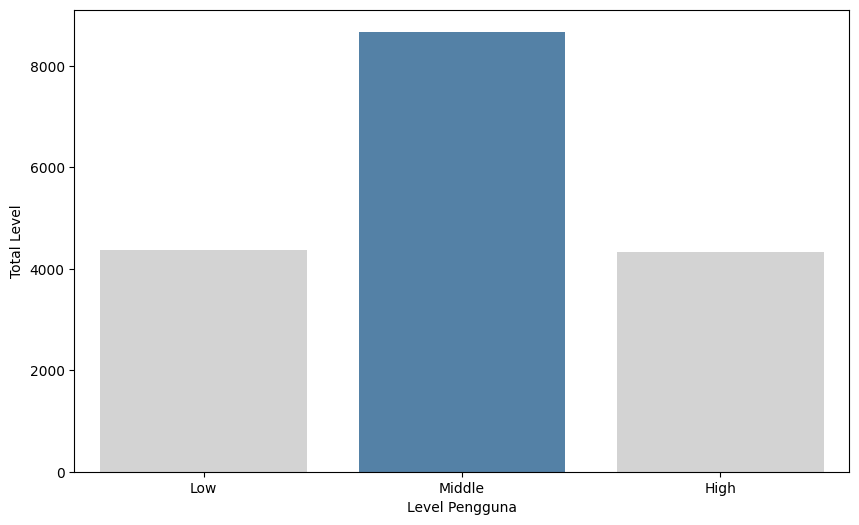

In [45]:
colors = ["#D3D3D3", "#4682B4", "#D3D3D3"]

plt.figure(figsize=(10, 6))
sns.barplot(x='level_pengguna', y='count', data=user_levels_total, palette=colors)
plt.ylabel('Total Level')
plt.xlabel('Level Pengguna')
plt.show()

## Conclusion

- Produktivitas Berdasarkan Jam pada Workingday dan Holiday di Musim Panas  
   - Pola penggunaan sepeda berbeda antara hari kerja (workingday) dan hari libur (holiday).  
   - Pada hari kerja, terdapat dua puncak penggunaan, yaitu pagi hari pukul 08.00 dan sore hari pukul 17.00, yang mencerminkan jam sibuk perjalanan kerja.  
   - Pada hari libur, penggunaan sepeda meningkat di siang hari dengan puncak pada pukul 13.00, kemudian menurun bertahap hingga malam.  
   - Pola ini menunjukkan bahwa aktivitas harian memengaruhi penggunaan sepeda.  

- Pengaruh Musim terhadap Jenis Pengguna  
   - Pengguna terdaftar (registered) selalu mendominasi di setiap musim, dengan jumlah tertinggi pada musim gugur (fall) dan terendah pada musim semi (spring).  
   - Pengguna kasual (casual) menunjukkan variasi lebih besar, dengan jumlah tertinggi pada musim gugur (fall) dan terendah pada musim semi(spring).  
   - Musim memengaruhi preferensi penggunaan sepeda, terutama bagi pengguna kasual yang lebih sensitif terhadap perubahan cuaca.  

- Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda  
   - Penggunaan sepeda tertinggi terjadi saat cuaca cerah (clear), sedangkan yang terendah saat hujan lebat (heavy rain).  
   - Pengguna lebih sering memanfaatkan layanan sepeda ketika cuaca mendukung, sedangkan kondisi buruk seperti hujan lebat mengurangi minat penggunaan.  
   - Cuaca menjadi faktor penting dalam menentukan tren penggunaan sepeda.

In [46]:
hour_df.to_csv("main_data.csv", index=False)